In [7]:
import numpy as np

from matplotlib import style as mstyle
mstyle.use('ggplot')

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [8]:
def step(X):
    """Given a game board ``X``, make a time step and return the result.
    
    For each cell, 
    * if the sum of the n.neighbors is 3,
              the next stage is life
    * if the sum of the n.neighbors is 4,
              the next stage does not change
    * otherwise, the next stage is zero
    
    NB: In this implementation the game field is finite.

    """
    num_neighb = (X[:-2, :-2]  + X[1:-1, :-2]  + X[2:, :-2] +
                  X[:-2, 1:-1] + X[1:-1, 1:-1] + X[2:, 1:-1] +
                  X[:-2, 2:]   + X[1:-1, 2:]   + X[2:, 2:])
    
    X[1:-1, 1:-1][num_neighb == 3] = 1
    X[1:-1, 1:-1][(num_neighb != 4) & (num_neighb != 3)] = 0
    return X

In [9]:
def animate_field(frames=100):
    fig, ax = plt.subplots()
    ax.set_xlim(0, field.shape[0])
    ax.set_ylim(0, field.shape[1])
    ax.set_aspect('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    x, y = np.nonzero(field)
    img, = ax.plot(x, y, 'mo', ms=17, alpha=0.5)

    def init():
        img.set_xdata([])
        img.set_ydata([])
        return img,

    def animate(i):
        global field
        field = step(field)
        x, y = np.nonzero(field)
        img.set_xdata(x)
        img.set_ydata(y)
        return img,

    ani = animation.FuncAnimation(fig, animate, init_func=init, interval=350)
    
    return ani

<IPython.core.display.Javascript object>


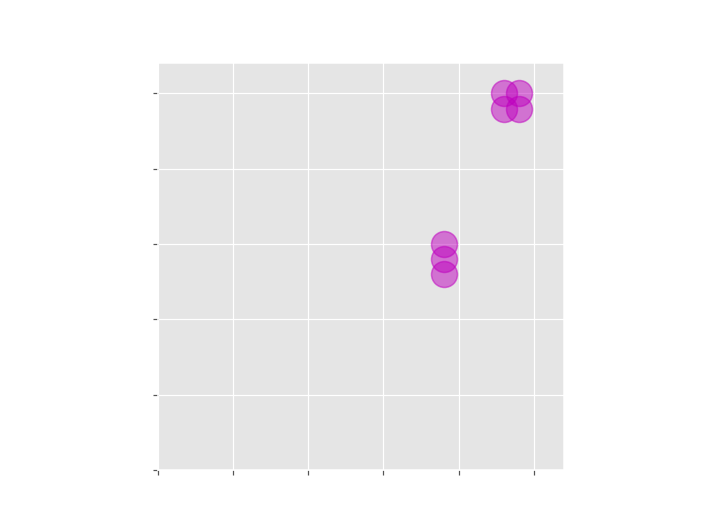

In [13]:
N = 27

# a simple blinker
#field = np.zeros((N, N), dtype=int)
#field[3:6, 2] = 1

field = np.zeros((N, N), dtype=int)
np.random.seed(1234)
r = np.random.random(size=(12, 12))
field[10:22, 10:22] = r > 0.1

ani = animate_field()
plt.show()

In [11]:
# 1234 / 12x12 / N=27 / thresh=0.6